In [1]:
import pandas as pd
import numpy as np

filename = "/lustre/isaac/scratch/tmengel/jet-background-subtraction/datasets/root-files/AuAu_R04/test/AuAu_R04_50_test_sample.h5"
pdf = pd.read_hdf(filename, key='df')

Variables =  ['event_cent_bin', 'event_multiplicity', 'event_pt_hard_bin', 'event_weight', 'jet_angularity',
            'jet_angularity_truth', 'jet_area', 'jet_area_truth', 'jet_average_track_pt', 'jet_average_track_pt_truth',
            'jet_eta', 'jet_eta_truth', 'jet_nparts', 'jet_nparts_pythia', 'jet_nparts_truth',
            'jet_phi', 'jet_phi_truth', 'jet_pt_area_corrected', 'jet_pt_multiplicity_corrected',
            'jet_pt_pythia', 'jet_pt_pythia_fraction', 'jet_pt_raw', 'jet_pt_truth', 'jet_r_parameter',
            'jet_track_deltaR_0', 'jet_track_deltaR_1', 'jet_track_deltaR_truth_0', 'jet_track_deltaR_truth_1',
            'jet_track_energy_fraction_0', 'jet_track_energy_fraction_1', 'jet_track_energy_fraction_truth_0',
            'jet_track_energy_fraction_truth_1', 'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
            'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7', 'jet_track_pt_8', 'jet_track_pt_9',
            'jet_track_pt_kurtosis', 'jet_track_pt_kurtosis_truth', 'jet_track_pt_skewness', 'jet_track_pt_skewness_truth',
            'jet_track_pt_truth_0', 'jet_track_pt_truth_1', 'jet_track_pt_truth_2', 'jet_track_pt_truth_3', 'jet_track_pt_truth_4',
            'jet_track_pt_truth_5', 'jet_track_pt_truth_6', 'jet_track_pt_truth_7', 'jet_track_pt_truth_8', 'jet_track_pt_truth_9',
            'jet_track_pt_variance', 'jet_track_pt_variance_truth', 'median_pt_over_area', 'median_pt_over_npart', 'random_cone_nparts',
            'random_cone_nparts_pythia', 'random_cone_pt']

Test_Variables =  ['jet_angularity', 'event_multiplicity',
             'jet_area', 'jet_average_track_pt', 
             'jet_nparts',
             'jet_pt_raw', 
             'jet_track_deltaR_0', 'jet_track_deltaR_1',
             'jet_track_energy_fraction_0', 'jet_track_energy_fraction_1', 
             'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
             'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7', 'jet_track_pt_8', 'jet_track_pt_9',
             'jet_track_pt_kurtosis',  'jet_track_pt_skewness', 
             'jet_track_pt_variance', 'median_pt_over_area', 'median_pt_over_npart', 'random_cone_nparts', 'random_cone_pt']

target = 'jet_nparts_pythia'
background_target = "jet_nparts_bkgd"
pdf['jet_nparts_bkgd'] = pdf['jet_nparts'] - pdf['jet_nparts_pythia']


In [1]:
track_pt_bins = [1, 1.3318, 1.7758,2.3677,3.1569,4.2092,5.6123,7.4831,9.9775,13.3033,17.7377,23.6503,31.5337,42.0449,56.0599,74.7466,99.66]
n_bins = len(track_pt_bins) - 1
print(n_bins)

16


In [18]:
import ROOT
import numpy as np

track_pts = []
track_pts_pythia = []
jet_pts = []
jet_nparts = []
jet_nparts_pythia = []
njets = 0
njets_rejected = 0

n_pt_hard_bins = 25
for ptbin in range(0,n_pt_hard_bins):
    filename = f'/lustre/isaac/scratch/tmengel/jet-background-subtraction/simulation/jet-trees/root-files/200GeV/R04/Raw/JetMult/200GeV_AuAu_ptbin{ptbin}_cent0to40_R04.root'
    f = ROOT.TFile.Open(filename, 'READ')
    tree  = f.Get('tree')

    nparts = np.zeros(1, dtype=int)
    nparts_pythia = np.zeros(1, dtype=int)
    jet_pt = np.zeros(1, dtype="float32")
    track_pt = np.zeros(250, dtype="float32")
    pythia_track_pt = np.zeros(250, dtype="float32")

    tree.SetBranchAddress("jet_nparts" , nparts)
    tree.SetBranchAddress("jet_nparts_pythia" , nparts_pythia)
    tree.SetBranchAddress("jet_pt_raw" , jet_pt)
    tree.SetBranchAddress("jet_track_pt" , track_pt)
    tree.SetBranchAddress("jet_pythia_tracks_pt" , pythia_track_pt)
    
    nentries = tree.GetEntries()
    for i in range(nentries):
        tree.GetEntry(i)
        
        if jet_pt[0] < 10:
            njets_rejected+=1
            continue
        if not nparts[0] > 0:
            njets_rejected+=1
            continue
        if not nparts_pythia[0] > 0:
            njets_rejected+=1
            continue
        
        jet_pts.append(jet_pt[0])
        jet_nparts.append(nparts[0])
        jet_nparts_pythia.append(nparts_pythia[0])
        
        for ipart in range(nparts[0]):
            track_pts.append(track_pt[ipart])
        
        for ipart in range(nparts_pythia[0]):
            track_pts_pythia.append(pythia_track_pt[ipart])
            
        njets += 1
    
    f.Close()
    

In [1]:
import ROOT
import numpy as np
def TH1toMatplot(hist):
    x = np.array([hist.GetBinCenter(i) for i in range(1,hist.GetNbinsX()+1)])
    x_err = np.array([hist.GetBinWidth(i)/2 for i in range(1,hist.GetNbinsX()+1)])
    y = np.array([hist.GetBinContent(i) for i in range(1,hist.GetNbinsX()+1)])
    y_err = np.array([hist.GetBinError(i) for i in range(1,hist.GetNbinsX()+1)])
    return [x,x_err],[y,y_err]

Welcome to JupyROOT 6.26/02


In [2]:
filename = f'/lustre/isaac/scratch/tmengel/jet-background-subtraction/datasets/JetMult/200GeV/R04/200GeV_NpartHists_R04.root'
f = ROOT.TFile.Open(filename, 'READ')
tree  = f.Get('tree')

h_nparts_vs_pt_track = f.Get('h_nparts_vs_pt_track')
h_nparts_vs_pt_track_pythia = f.Get('h_nparts_vs_pt_track_pythia')

h_nparts_vs_pt_track = TH1toMatplot(h_nparts_vs_pt_track)
h_nparts_vs_pt_track_pythia = TH1toMatplot(h_nparts_vs_pt_track_pythia)


In [25]:
# x = [0.090717953, 0.135335283, 0.201896518, 0.301194212, 0.449328964, 0.670320046, 1.0,7.0]

0.740818221
0.496585304
0.332871084
0.22313016
0.149568619
0.100258844
0.067205513

x = [0.067205513, 0.100258844, 0.149568619, 0.22313016, 0.332871084, 0.496585304, 0.740818221]

# 0.78	0.94	0.96	1.44	1.03	0.75
# 1.062842712	1.118044938	1.116204994	1.744795013	1.235182845	1.075729949
# 0.497157288	0.761955062	0.803795006	1.135204987	0.824817155	0.424270051
# y_points = [0.78, 0.94, 0.96, 1.44, 1.03, 0.75]
# y_high = [1.062842712, 1.118044938, 1.116204994, 1.744795013, 1.235182845, 1.075729949]
# y_low = [0.497157288, 0.761955062, 0.803795006, 1.135204987, 0.824817155, 0.424270051]

# 0.779294553	0.315753068	0.308058436	0.265706605	0.306104557	0.259422435
# 2.079294553	1.335753068	1.428058436	1.315706605	1.536104557	0.949422435
# 0.520705447	0.704246932	0.811941564	0.784293395	0.923895443	0.430577565
y_points = [0.779294553, 0.315753068, 0.308058436, 0.265706605, 0.306104557, 0.259422435]
y_high = [2.079294553, 1.335753068, 1.428058436, 1.315706605, 1.536104557, 0.949422435]
y_low = [0.520705447, 0.704246932, 0.811941564, 0.784293395, 0.923895443, 0.430577565]


x = np.array(x)
x = x*14.5594
print(x)

[ 0.97847195  1.45970861  2.17762935  3.24864125  4.84640326  7.22998408
 10.78586881]


In [10]:
x = [3.429065744,3.221453287,3.006920415,2.823529412,2.629757785,2.415224913,2.200692042,2.027681661,1.816608997,1.619377163,1.397923875,1.200692042,0.996539792,0.799307958,0.598615917,0.408304498,0.207612457]
# y = [1.017631102,1.121115671,1.126177133,1.054971248,1.050229812,1.02453027,1.003971831,1.054971248,0.955437827,0.917478506,0.895027441,0.869201608,0.821612434,0.869201608,1.093681523,1.243497443,1.410654885,1.0669187]
#reverse x 
#2.766208133	3.047508356	3.061266836	2.867709173	2.854820614	2.784962015	2.729078384	2.867709173	2.597149284	2.493965151	2.432936829	2.362734937	2.23337415	2.362734937	2.972934611	3.380176503	3.83455754	2.900185716
y = [2.766208133,3.047508356,3.061266836,2.867709173,2.854820614,2.784962015,2.729078384,2.867709173,2.597149284,2.493965151,2.432936829,2.362734937,2.23337415,2.362734937,2.972934611,3.380176503,3.83455754,2.900185716]
x = x[::-1]
print(x)
print(len(x))


[0.207612457, 0.408304498, 0.598615917, 0.799307958, 0.996539792, 1.200692042, 1.397923875, 1.619377163, 1.816608997, 2.027681661, 2.200692042, 2.415224913, 2.629757785, 2.823529412, 3.006920415, 3.221453287, 3.429065744]
17


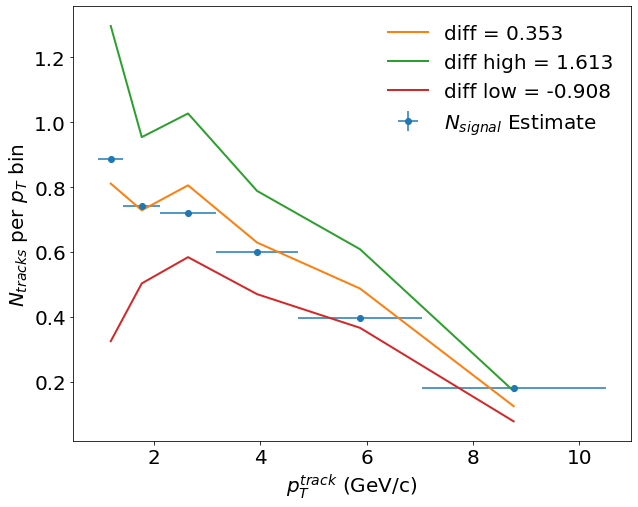

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)


ratio_0to10 = [1.56974,	1.54357,	1.44922,	1.24213,	1.05766,	0.939139,	0.870037,	0.844948,	0.849585,	0.880243,	0.917849,	0.973565,	1.03594,	1.10835	,1.22642,	1.37531]
ratio_10to20 =[1.55,	1.51956,	1.40609,	1.22336,	1.04733,	0.941316,	0.883168,	0.854606,	0.869903,	0.894005,	0.929716,	0.976171,	1.02782,	1.10822,	1.1379,	1.3622]
ratio_20to30 = [1.45416,	1.39412,	1.35086,	1.17228,	1.03275,	0.950222,	0.902511,	0.861627,	0.874271,	0.913821,	0.930991,	0.999029,	1.04065,	1.07956,	1.17815,	1.25704]
ratio_30to40 = [1.40733,	1.34702,	1.26038,	1.12673,	1.00495,	0.957334,	0.915105,	0.902671,	0.883873,	0.924078,	0.958214,	0.988773,	1.00174,	1.09045,	1.13472,	1.34419]
ratio_40to60 = [1.28113,	1.24543,	1.17065,	1.05979,	1.00464,	0.942618,	0.921812,	0.930124,	0.927777,	0.966525,	0.977135,	0.994405,	1.00774,	1.04171,	1.11,	1.21679]
ratio_60to80 = [1.1023,	1.06563,	1.04647,	0.992725,	0.96386,	0.963229,	0.955529,	0.940554,	0.968406,	1.00073,	1.02302,	1.0788,	1.05099, 1.06217,	1.04657,	1.06669]

# y_points = [0.779294553, 0.315753068, 0.308058436, 0.265706605, 0.306104557, 0.259422435]
y_points =[1.3,	1.02,	1.12,	1.05,	1.23,	0.69]

y_high = [2.079294553, 1.335753068, 1.428058436, 1.315706605, 1.536104557, 0.949422435]
y_low = [0.520705447, 0.704246932, 0.811941564, 0.784293395, 0.923895443, 0.430577565]



# y = [1.017631102,1.121115671,1.126177133,1.054971248,1.050229812,1.02453027,1.003971831,1.054971248,0.955437827,0.917478506,0.895027441,0.869201608,0.821612434,0.869201608,1.093681523,1.243497443,1.410654885,1.0669187]
# y = [2.766208133,3.047508356,3.061266836,2.867709173,2.854820614,2.784962015,2.729078384,2.867709173,2.597149284,2.493965151,2.432936829,2.362734937,2.23337415,2.362734937,2.972934611,3.380176503,3.83455754,2.900185716]
#average i and i+1
# y = [(y[i]+y[i+1])/2 for i in range(len(y)-1)]
# y=y[1:]

ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0], h_nparts_vs_pt_track[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'$N_{signal}$ Estimate')
# ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0],ratio_0to10*h_nparts_vs_pt_track_pythia[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'0-10% modification')
# ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0],ratio_10to20*h_nparts_vs_pt_track_pythia[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'10-20% modification')
# ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0],ratio_20to30*h_nparts_vs_pt_track_pythia[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'20-30% modification')
# ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0],ratio_30to40*h_nparts_vs_pt_track_pythia[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'30-40% modification')
# ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0],ratio_40to60*h_nparts_vs_pt_track_pythia[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'40-60% modification')
# ax1.errorbar(h_nparts_vs_pt_track_pythia[0][0],ratio_60to80*h_nparts_vs_pt_track_pythia[1][0], xerr=h_nparts_vs_pt_track_pythia[0][1], yerr=h_nparts_vs_pt_track_pythia[1][1], fmt='o', label=r'60-80% modification')

average_number_of_particle = np.sum(h_nparts_vs_pt_track_pythia[1][0])
correction = np.sum(y_points*h_nparts_vs_pt_track_pythia[1][0])
correction_high = np.sum(y_high*h_nparts_vs_pt_track_pythia[1][0])
correction_low = np.sum(y_low*h_nparts_vs_pt_track_pythia[1][0])
diff_correction = correction-average_number_of_particle
diff_correction_high = correction_high-average_number_of_particle
diff_correction_low = correction_low-average_number_of_particle


# corrected_average_number_of_particle_0to10 = np.sum(ratio_0to10*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_10to20 = np.sum(ratio_10to20*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_20to30 = np.sum(ratio_20to30*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_30to40 = np.sum(ratio_30to40*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_40to60 = np.sum(ratio_40to60*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_60to80 = np.sum(ratio_60to80*h_nparts_vs_pt_track_pythia[1][0])
# diff_0to10 = corrected_average_number_of_particle_0to10 - average_number_of_particle
# diff_10to20 = corrected_average_number_of_particle_10to20 - average_number_of_particle
# diff_20to30 = corrected_average_number_of_particle_20to30 - average_number_of_particle
# diff_30to40 = corrected_average_number_of_particle_30to40 - average_number_of_particle
# diff_40to60 = corrected_average_number_of_particle_40to60 - average_number_of_particle
# diff_60to80 = corrected_average_number_of_particle_60to80 - average_number_of_particle

# ax1.plot(h_nparts_vs_pt_track_pythia[0][0], h_nparts_vs_pt_track_pythia[1][0], label=r'$N_{signal}$ Estimate')
ax1.plot(h_nparts_vs_pt_track_pythia[0][0], y_points*h_nparts_vs_pt_track_pythia[1][0], label=f'diff = {diff_correction:.3f}', linewidth=2)
ax1.plot(h_nparts_vs_pt_track_pythia[0][0], y_high*h_nparts_vs_pt_track_pythia[1][0], label=f'diff high = {diff_correction_high:.3f}', linewidth=2)
ax1.plot(h_nparts_vs_pt_track_pythia[0][0], y_low*h_nparts_vs_pt_track_pythia[1][0], label=f'diff low = {diff_correction_low:.3f}', linewidth=2)
# ax1.plot(h_nparts_vs_pt_track_pythia[0][0],ratio_0to10*h_nparts_vs_pt_track_pythia[1][0], label=f'0-10% modification, diff = {diff_0to10:.3f}', linewidth=2)
# ax1.plot(h_nparts_vs_pt_track_pythia[0][0],ratio_10to20*h_nparts_vs_pt_track_pythia[1][0], label=f'10-20% modification, diff = {diff_10to20:.3f}', linewidth=2)
# ax1.plot(h_nparts_vs_pt_track_pythia[0][0],ratio_20to30*h_nparts_vs_pt_track_pythia[1][0], label=f'20-30% modification, diff = {diff_20to30:.3f}', linewidth=2)
# ax1.plot(h_nparts_vs_pt_track_pythia[0][0],ratio_30to40*h_nparts_vs_pt_track_pythia[1][0], label=f'30-40% modification, diff = {diff_30to40:.3f}', linewidth=2)
# ax1.plot(h_nparts_vs_pt_track_pythia[0][0],ratio_40to60*h_nparts_vs_pt_track_pythia[1][0], label=f'40-60% modification, diff = {diff_40to60:.3f}', linewidth=2)
# ax1.plot(h_nparts_vs_pt_track_pythia[0][0],ratio_60to80*h_nparts_vs_pt_track_pythia[1][0], label=f'60-80% modification, diff = {diff_60to80:.3f}', linewidth=2)




# average_number_of_particle = np.sum(h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_0to10 = np.sum(ratio_0to10*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_10to20 = np.sum(ratio_10to20*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_20to30 = np.sum(ratio_20to30*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_30to40 = np.sum(ratio_30to40*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_40to60 = np.sum(ratio_40to60*h_nparts_vs_pt_track_pythia[1][0])
# corrected_average_number_of_particle_60to80 = np.sum(ratio_60to80*h_nparts_vs_pt_track_pythia[1][0])
# diff_0to10 = corrected_average_number_of_particle_0to10 - average_number_of_particle
# diff_10to20 = corrected_average_number_of_particle_10to20 - average_number_of_particle
# diff_20to30 = corrected_average_number_of_particle_20to30 - average_number_of_particle
# diff_30to40 = corrected_average_number_of_particle_30to40 - average_number_of_particle
# diff_40to60 = corrected_average_number_of_particle_40to60 - average_number_of_particle
# diff_60to80 = corrected_average_number_of_particle_60to80 - average_number_of_particle

# ax1.text(0.5, 0.7, f'0-10%: {diff_0to10:.2f}\n10-20%: {diff_10to20:.2f}\n20-30%: {diff_20to30:.2f}\n30-40%: {diff_30to40:.2f}\n40-60%: {diff_40to60:.2f}\n60-80%: {diff_60to80:.2f}', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=15)

ax1.set_xlabel(r'$p_{T}^{track}$ (GeV/c)', fontsize=20)
ax1.set_ylabel(r'$N_{tracks}$ per $p_{T}$ bin', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
# ax1.set_yscale('log')
# ax.set_yscale('log')
ax1.legend(fontsize=20, loc='best', frameon=False)

plt.show()

In [ ]:
#1.55	1.51956	1.40609	1.22336	1.04733	0.941316	0.883168	0.854606	0.869903	0.894005	0.929716	0.976171	1.02782	1.10822	1.1379	1.3622
# 1.45416	1.39412	1.35086	1.17228	1.03275	0.950222	0.902511	0.861627	0.874271	0.913821	0.930991	0.999029	1.04065	1.07956	1.17815	1.25704
# 1.40733	1.34702	1.26038	1.12673	1.00495	0.957334	0.915105	0.902671	0.883873	0.924078	0.958214	0.988773	1.00174	1.09045	1.13472	1.34419
# 1.28113	1.24543	1.17065	1.05979	1.00464	0.942618	0.921812	0.930124	0.927777	0.966525	0.977135	0.994405	1.00774	1.04171	1.11	1.21679
# 1.1023	1.06563	1.04647	0.992725	0.96386	0.963229	0.955529	0.940554	0.968406	1.00073	1.02302	1.0788	1.05099	1.06217	1.04657	1.06669

ratio_0to10 = [1.56974,	1.54357,	1.44922,	1.24213,	1.05766,	0.939139,	0.870037,	0.844948,	0.849585,	0.880243,	0.917849,	0.973565,	1.03594,	1.10835	,1.22642,	1.37531]
ratio_10to20 =[1.55,	1.51956,	1.40609,	1.22336,	1.04733,	0.941316,	0.883168,	0.854606,	0.869903,	0.894005,	0.929716,	0.976171,	1.02782,	1.10822,	1.1379,	1.3622]
ratio_20to30 = [1.45416,	1.39412,	1.35086,	1.17228,	1.03275,	0.950222,	0.902511,	0.861627,	0.874271,	0.913821,	0.930991,	0.999029,	1.04065,	1.07956,	1.17815,	1.25704]
ratio_30to40 = [1.40733,	1.34702,	1.26038,	1.12673,	1.00495,	0.957334,	0.915105,	0.902671,	0.883873,	0.924078,	0.958214,	0.988773,	1.00174,	1.09045,	1.13472,	1.34419]
ratio_40to60 = [1.28113,	1.24543,	1.17065,	1.05979,	1.00464,	0.942618,	0.921812,	0.930124,	0.927777,	0.966525,	0.977135,	0.994405,	1.00774,	1.04171,	1.11,	1.21679]
ratio_60to80 = [1.1023,	1.06563,	1.04647,	0.992725,	0.96386,	0.963229,	0.955529,	0.940554,	0.968406,	1.00073,	1.02302,	1.0788,	1.05099, 1.06217,	1.04657,	1.06669]

In [24]:
ratio_coefficent = [1.56974,	1.54357,	1.44922,	1.24213,	1.05766,	0.939139,	0.870037,	0.844948,	0.849585,	0.880243,	0.917849,	0.973565,	1.03594,	1.10835	,1.22642,	1.37531]
track_pt_bins = [1, 1.3318, 1.7758,2.3677,3.1569,4.2092,5.6123,7.4831,9.9775,13.3033,17.7377,23.6503,31.5337,42.0449,56.0599,74.7466,99.66]
n_bins = len(track_pt_bins) - 1

([array([ 1.16589999,  1.55379999,  2.07175004,  2.76230001,  3.68304992,
          4.91074991,  6.54769993,  8.73029995, 11.64039993, 15.52049971,
         20.69399929, 27.59200001, 36.78929996, 49.05239868, 65.40324783,
         87.20330048]),
  array([ 0.16589999,  0.222     ,  0.29595006,  0.39459991,  0.52614999,
          0.70155001,  0.93540001,  1.24720001,  1.66289997,  2.2171998 ,
          2.95629978,  3.94170094,  5.25559902,  7.00749969,  9.34334946,
         12.45670319])],
 [array([2.02365184e+00, 9.47470546e-01, 4.58022416e-01, 2.90873140e-01,
         2.34809741e-01, 2.02580422e-01, 1.72875211e-01, 1.42781556e-01,
         1.13138400e-01, 8.53792056e-02, 6.00716770e-02, 3.85568924e-02,
         2.13891938e-02, 9.42660030e-03, 2.68290401e-03, 2.47043994e-04]),
  array([4.63308534e-04, 3.17018974e-04, 2.20417336e-04, 1.75652443e-04,
         1.57819421e-04, 1.46588922e-04, 1.35415627e-04, 1.23066100e-04,
         1.09548753e-04, 9.51652692e-05, 7.98246983e-05, 6.39518985

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
hist, bin_edges, _ = ax.hist(track_pts, bins=track_pt_bins, histtype='step', label='Measured', color='black', linewidth=2)
hist_pythia, bin_edges_pythia, _ = ax.hist(track_pts_pythia, bins=track_pt_bins, histtype='step', label='Pythia', color='red', linewidth=2)

ax.set_xlabel(r'$p_{T}^{track}$ (GeV/c)', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
ax.legend(fontsize=20)
plt.show()

KeyboardInterrupt: 

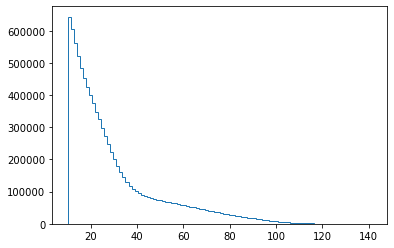

In [23]:
import matplotlib.pyplot as plt
# plt.hist(all_nparts, bins=range(1, 100), histtype='step', label='All')
# plt.hist(all_nparts_pythia, bins=range(1, 100), histtype='step', label='Pythia')
# all_jet_pts = np.array(all_jet_pts)
jet_pts_np = np.array(jet_pts)
plt.hist(jet_pts_np,range = (np.min(jet_pts_np), np.max(jet_pts_np)), bins=100, histtype='step', label='All')
# plt.legend()
plt.show()

In [ ]:
hist, bins = np.histogram(all_track_pts, bins=track_pt_bins)

In [16]:
from sklearn.feature_selection import mutual_info_regression, f_regression, r_regression

mi_array = mutual_info_regression(pdf[Test_Variables], pdf[target], random_state=0)
mi_array /= np.sum(mi_array)

var_score = pdf[Test_Variables].var().sort_values(ascending=False)
var_score /= np.sum(var_score)

f_score = f_regression(pdf[Test_Variables], pdf[target])[0]
f_score /= np.sum(f_score)

r_score = r_regression(pdf[Test_Variables], pdf[target])
r_score /= np.sum(r_score)

mi_array_bdkg = mutual_info_regression(pdf[Test_Variables], pdf[background_target], random_state=0)
mi_array_bdkg /= np.sum(mi_array_bdkg)

f_score_bdkg = f_regression(pdf[Test_Variables], pdf[background_target])[0]
f_score_bdkg /= np.sum(f_score_bdkg)

r_score_bdkg = r_regression(pdf[Test_Variables], pdf[background_target])
r_score_bdkg /= np.sum(r_score_bdkg)

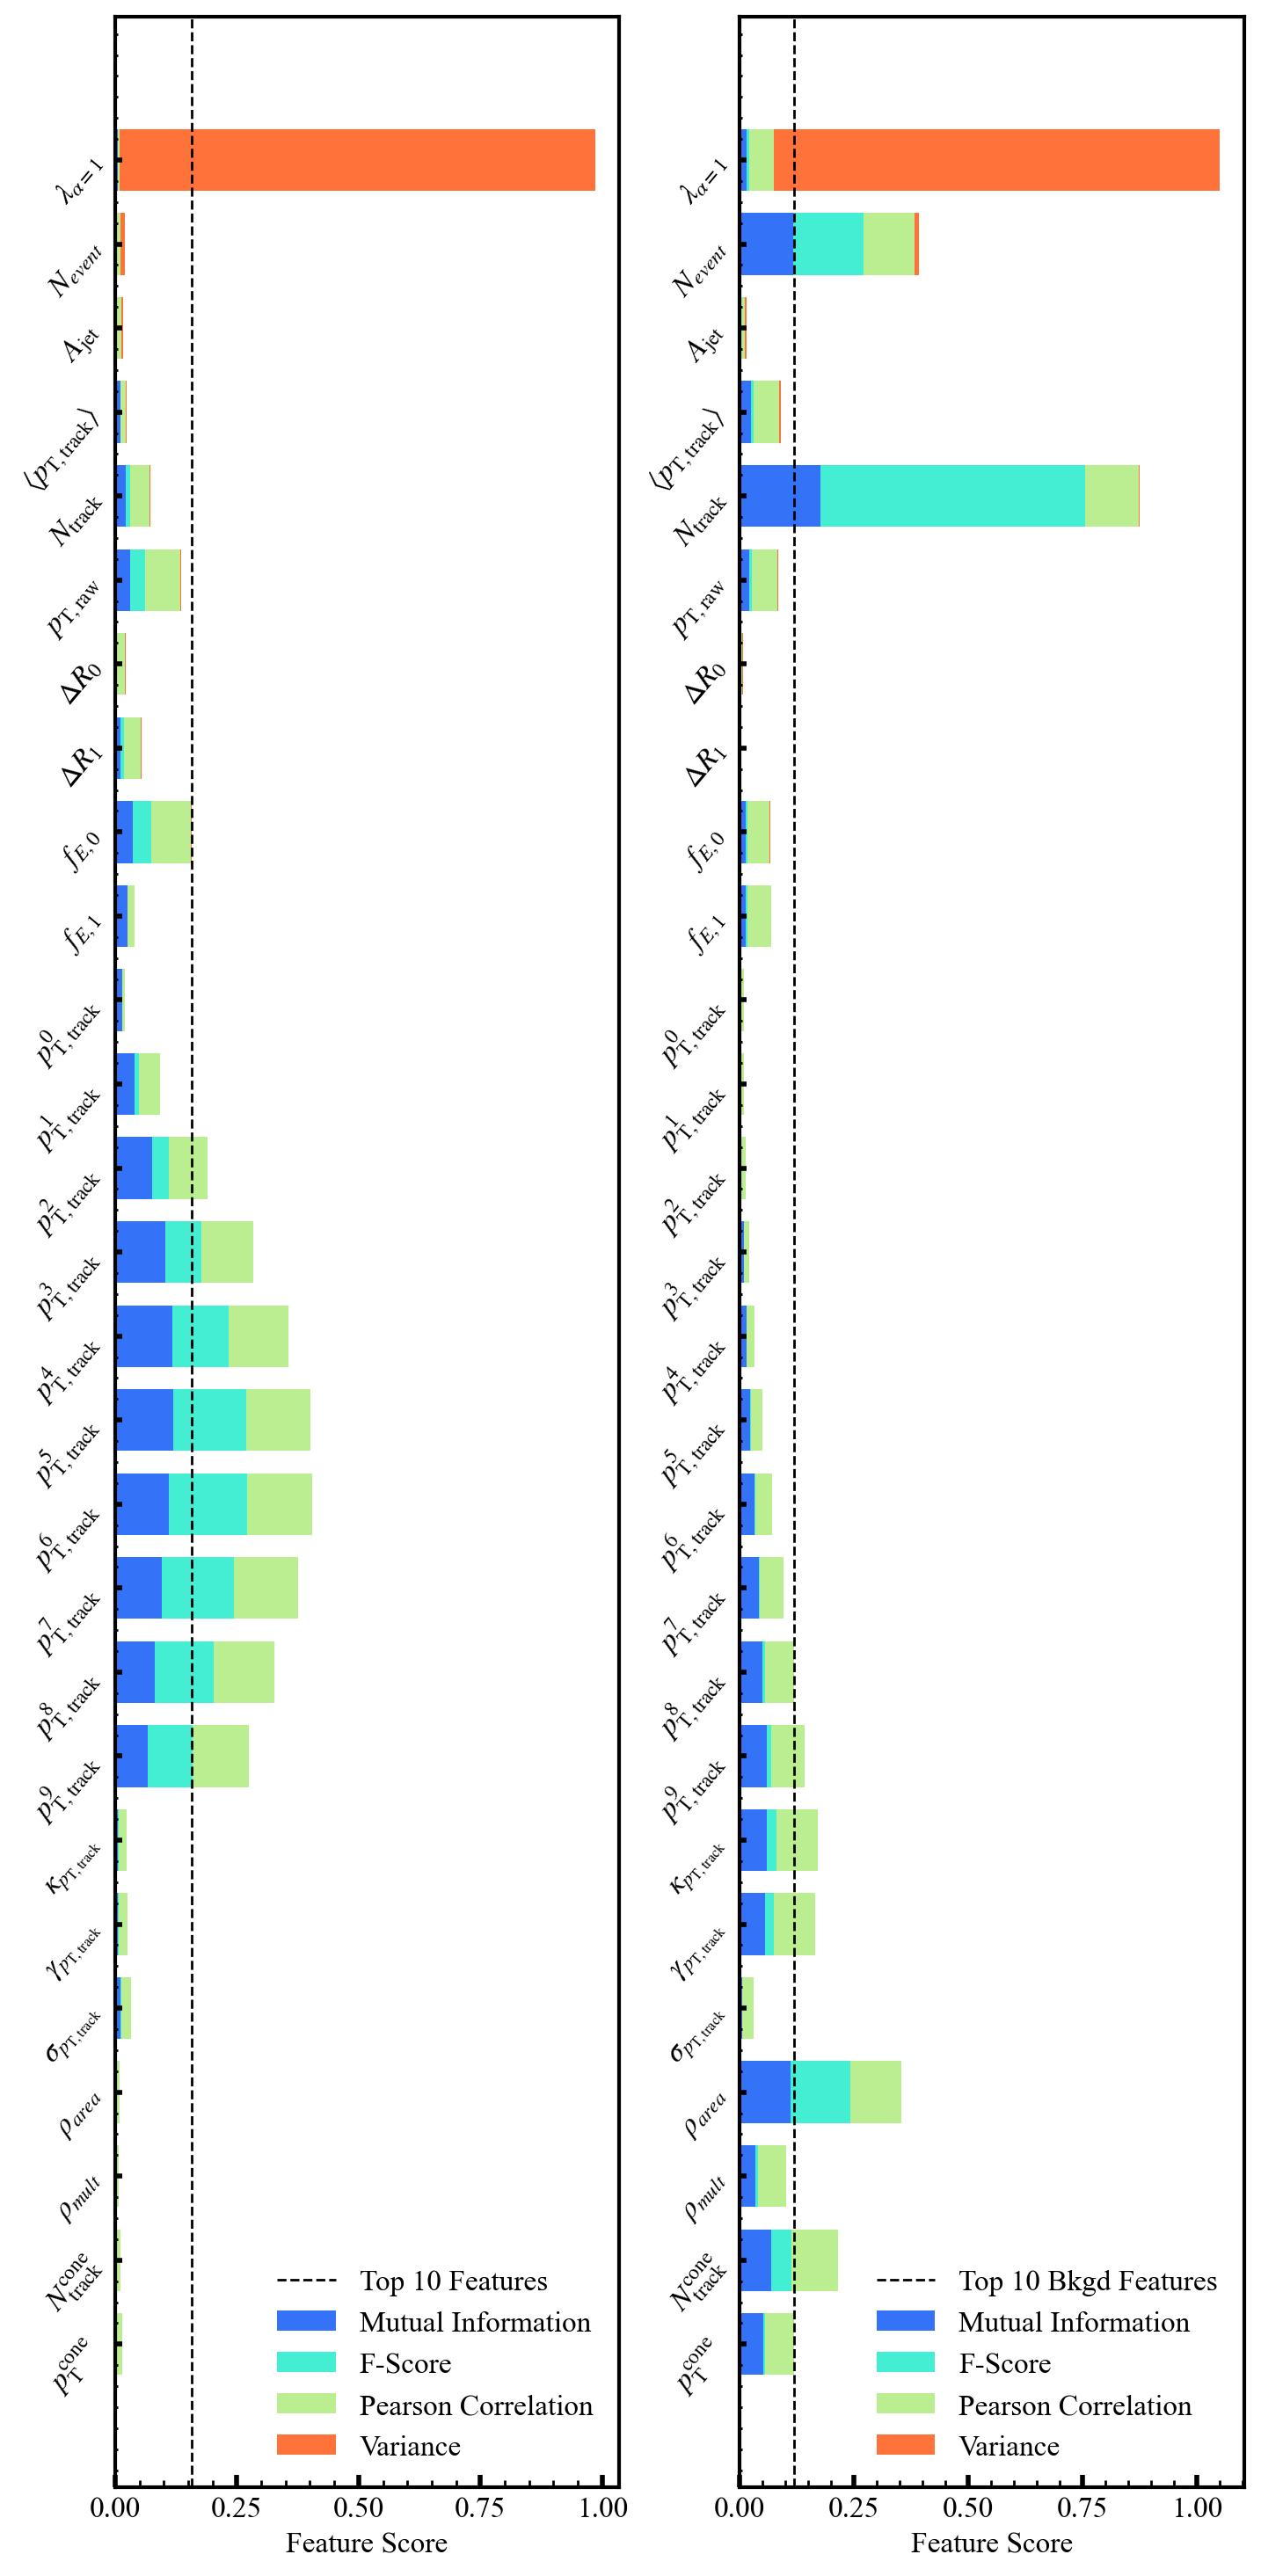

In [17]:
import matplotlib.pyplot as plt

def GetFigSize(fig_width_pt=510.0, denominator=3.0):
    inches_per_pt = 1.0/72.27 
    golden_mean = (np.sqrt(5)-1.0)/denominator
    fig_width = fig_width_pt*inches_per_pt
    fig_height = fig_width*golden_mean
    return [fig_width, fig_height]

figsize = GetFigSize(510, 0.6)
Test_Variables_tex =  [r'$\lambda_{\alpha=1}$', r'$N_{event}$',
                       r'$A_{\mathrm{jet}}$', r'$\langle p_{\mathrm{T,track}} \rangle$',
                       r'$N_{\mathrm{track}}$', r'$p_{\mathrm{T,raw}}$',
                       r'$\Delta R_{0}$', r'$\Delta R_{1}$',
                       r'$f_{E,0}$', r'$f_{E,1}$',
                       r'$p_{\mathrm{T,track}}^{0}$', r'$p_{\mathrm{T,track}}^{1}$', r'$p_{\mathrm{T,track}}^{2}$', r'$p_{\mathrm{T,track}}^{3}$',
                       r'$p_{\mathrm{T,track}}^{4}$', r'$p_{\mathrm{T,track}}^{5}$', r'$p_{\mathrm{T,track}}^{6}$', r'$p_{\mathrm{T,track}}^{7}$', r'$p_{\mathrm{T,track}}^{8}$', r'$p_{\mathrm{T,track}}^{9}$',
                       r'$\kappa_{p_{\mathrm{T,track}}}$', r'$\gamma_{p_{\mathrm{T,track}}}$',
                       r'$\sigma_{p_{\mathrm{T,track}}}$', r'$\rho_{area}$', r'$\rho_{mult}$', r'$N_{\mathrm{track}}^{\mathrm{cone}}$', r'$p_{\mathrm{T}}^{\mathrm{cone}}$']


params = {'axes.labelsize': 12,
        'axes.linewidth' : 1.5,
        'font.size': 12,
        'font.family': 'Times New Roman',
        'mathtext.fontset': 'stix',
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'text.usetex': False,
        'lines.linewidth': 1,
        'lines.linestyle': ' ',
        'lines.markersize' : 6,
        'lines.markeredgewidth' : 1,
        'xtick.major.size' : 5,
        'xtick.minor.size' : 3,
        'xtick.major.width' : 2,
        'xtick.minor.width' : 1,
        'xtick.direction' : 'in',
        'ytick.major.size' : 3,
        'ytick.minor.size' : 1,
        'ytick.major.width' : 2,
        'ytick.minor.width' : 1,
        'ytick.direction' : 'in',
        'xtick.minor.visible' : True,
        'ytick.minor.visible' : True,
        'figure.figsize': figsize,
        'savefig.transparent': True,
        'errorbar.capsize': 1.5,
        }
plt.rcParams.update(params)
category_names = ['Mutual Information', 'F-Score', 'Pearson Correlation', 'Variance']
results = {}
for i in range(len(Test_Variables)):
    results[Test_Variables_tex[i]] = [ mi_array[i], f_score[i], np.abs(r_score[i]), var_score[i]]

labels = list(results.keys())
y_pos = np.linspace(1, 2*len(labels), len(labels))
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)

category_colors = plt.get_cmap('rainbow')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig = plt.figure(dpi=200,constrained_layout=True)
ax = fig.add_subplot(121)
ax.invert_yaxis()

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(y_pos, widths, left=starts,
            label=colname, color=color, height=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels,rotation=50)
#plot line for top 6 variables
totals = data_cum[:,-1]

idx = np.argsort(totals)
xline = totals[idx][-10]
ax.axvline(x=xline, color='k', linestyle='--', label='Top 10 Features', linewidth=1.0)
ax.legend(frameon=False, loc='best')
ax.set_xlabel('Feature Score')
ax.set_xlim(0, ax.get_xlim()[1])

results = {}
for i in range(len(Test_Variables)):
    results[Test_Variables_tex[i]] = [ mi_array_bdkg[i], f_score_bdkg[i], np.abs(r_score_bdkg[i]), var_score[i]]

labels = list(results.keys())
y_pos = np.linspace(1, 2*len(labels), len(labels))
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)

category_colors = plt.get_cmap('rainbow')(
    np.linspace(0.15, 0.85, data.shape[1]))

ax2 = fig.add_subplot(122)
ax2.invert_yaxis()

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax2.barh(y_pos, widths, left=starts,
            label=colname, color=color, height=1.5)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(labels,rotation=50)
#plot line for top 6 variables
totals = data_cum[:,-1]

idx = np.argsort(totals)
xline = totals[idx][-10]
ax2.axvline(x=xline, color='k', linestyle='--', label='Top 10 Bkgd Features', linewidth=1.0)
ax2.legend(frameon=False, loc='best')
ax2.set_xlabel('Feature Score')
ax2.set_xlim(0, ax2.get_xlim()[1])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
top_features = ['jet_angularity', 'event_multiplicity','jet_track_energy_fraction_0',
                'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
             'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7', 'jet_pt_raw']

best_guess = ['jet_angularity','jet_track_energy_fraction_0',
              'jet_track_pt_0', 'jet_track_pt_1',  'random_cone_nparts', 'random_cone_pt',  'median_pt_over_npart',
              'jet_nparts', 'jet_area','jet_average_track_pt', 'jet_pt_raw']

target = 'jet_nparts_pythia'

inputlen = len(top_features)
model = keras.Sequential(
            [
                layers.Dense(100,input_shape=(inputlen,),activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(100, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(50, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(1, activation='linear',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
            ])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(pdf[top_features], pdf[target], epochs=50, batch_size=256, verbose=1, validation_split=0.2)
pdf['nn_pred'] = model.predict(pdf[top_features])
pdf['pred_res'] = pdf['nn_pred'] - pdf[target]

inputlen = len(best_guess)
model = keras.Sequential(
            [
                layers.Dense(100,input_shape=(inputlen,),activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(100, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(50, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(1, activation='linear',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
            ])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(pdf[best_guess], pdf[target], epochs=50, batch_size=256, verbose=1, validation_split=0.2)
pdf['bg_pred'] = model.predict(pdf[best_guess])
pdf['bg_res'] = pdf['bg_pred'] - pdf[target]

Epoch 1/50
3125/3125 [==============================] - 6s 2ms/step - loss: 3.8145 - mse: 3.4745 - val_loss: 2.9531 - val_mse: 2.6527
Epoch 2/50
3125/3125 [==============================] - 5s 2ms/step - loss: 2.9689 - mse: 2.6973 - val_loss: 2.8484 - val_mse: 2.6031
Epoch 3/50
3125/3125 [==============================] - 5s 2ms/step - loss: 2.8448 - mse: 2.6221 - val_loss: 2.7885 - val_mse: 2.5867
Epoch 4/50
3125/3125 [==============================] - 5s 2ms/step - loss: 2.7709 - mse: 2.5870 - val_loss: 2.6717 - val_mse: 2.5046
Epoch 5/50
3125/3125 [==============================] - 5s 2ms/step - loss: 2.7141 - mse: 2.5612 - val_loss: 2.6849 - val_mse: 2.5450
Epoch 6/50
3125/3125 [==============================] - 5s 2ms/step - loss: 2.6709 - mse: 2.5415 - val_loss: 2.6825 - val_mse: 2.5624
Epoch 7/50
3125/3125 [==============================] - 5s 2ms/step - loss: 2.6407 - mse: 2.5285 - val_loss: 2.6276 - val_mse: 2.5228
Epoch 8/50
3125/3125 [==============================] - 5s 2ms

In [25]:
top_features_bkgd = ['jet_angularity', 'event_multiplicity','jet_track_energy_fraction_0', 'jet_nparts', 'jet_area',
                     'jet_pt_raw','random_cone_nparts', 'random_cone_pt',  'median_pt_over_npart',
                     'median_pt_over_npart']

background_target = 'jet_nparts_bkgd'

inputlen = len(top_features_bkgd)
model = keras.Sequential(
            [
                layers.Dense(100,input_shape=(inputlen,),activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(100, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(50, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
                layers.Dense(1, activation='linear',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.001)),
            ])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(pdf[top_features_bkgd], pdf[background_target], epochs=50, batch_size=256, verbose=1, validation_split=0.2)
pdf['bkdg_pred'] = model.predict(pdf[top_features_bkgd])
pdf['bkdg_res'] = pdf['nn_pred'] - pdf[background_target]

31249/31249 [==============================] - 19s 603us/step


/nfs/home/tmengel/.conda/envs/myhepenv/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


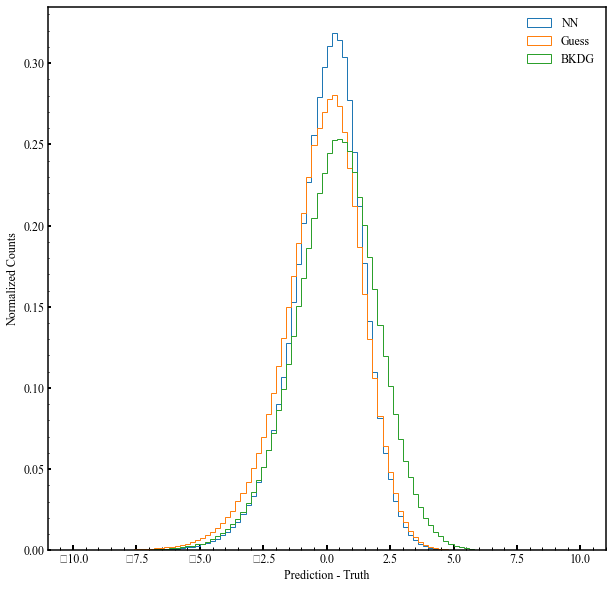

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pdf['bkdg_signal_pred'] = pdf['jet_nparts']- pdf['bkdg_pred']
pdf['bkdg_signal_res'] = pdf['bkdg_signal_pred'] - pdf['jet_nparts_pythia']

ax.hist(pdf['pred_res'], bins=100, range=(-10,10), histtype='step', label='NN', density=True)
ax.hist(pdf['bg_res'], bins=100, range=(-10,10), histtype='step', label='Guess', density=True)
ax.hist(pdf['bkdg_signal_res'], bins=100, range=(-10,10), histtype='step', label='BKDG', density=True)

ax.set_xlabel('Prediction - Truth')
ax.set_ylabel('Normalized Counts')
ax.legend(frameon=False, loc='best')
plt.show()

In [49]:
import pysr
from pysr import PySRRegressor

top_features_bkgd = ['jet_angularity', 'event_multiplicity','jet_track_energy_fraction_0', 'jet_nparts', 'jet_area',
                     'jet_pt_raw','random_cone_nparts', 'random_cone_pt',  'median_pt_over_npart',
                     'median_pt_over_npart']

top_features = ['jet_angularity', 'event_multiplicity','jet_track_energy_fraction_0',
                'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
             'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7', 'jet_pt_raw']

best_guess = ['jet_angularity','jet_track_energy_fraction_0',
              'jet_track_pt_0', 'jet_track_pt_1',  'random_cone_nparts', 'random_cone_pt',  'median_pt_over_npart',
              'jet_nparts', 'jet_area','jet_average_track_pt', 'jet_pt_raw']

target = 'jet_nparts_pythia'
background_target = 'jet_nparts_bkgd'

# def GetPySrModel(datafile,outputfile,target="jet_pt_dnn_corrected",cutvariable="jet_pt_truth",cutmin=0,cutmax=1000):
def GetPySrModel(sample, output_file,target,input_features):
           
    fileout = output_file.replace(".csv","")
    model = PySRRegressor(
            model_selection="best",  # Result is mix of simplicity+accuracy
            niterations=40,
            populations=20,
            maxdepth=15,
            binary_operators=["plus", "sub", "mult", "div"],
            unary_operators=["square", "exp"],
            select_k_features=5, # Select 5 features
            loss="L2DistLoss()", #mean_squared_error
            equation_file=f"{fileout}.csv",
            verbosity=0
        )
    
    X = sample[input_features].values
    Y = sample[target].values

    model.fit(X, Y,variable_names=input_features)
    return model.equation_file_ , model.get_best()["sympy_format"]

sample_data = pdf.sample(n=9999)

# nn_top, nn_top_eq = GetPySrModel(sample_data,"nn_top.csv",target='nn_pred',input_features=top_features)
# bestguess, bestguess_eq = GetPySrModel(sample_data,"bestguess.csv",target='bg_pred',input_features=best_guess)
# bkdg_top, bkdg_top_eq = GetPySrModel(sample_data,"bkdg_top.csv",target='bkdg_pred',input_features=top_features_bkgd)
symbreg2, symbreg_eq2 = GetPySrModel(sample_data,"symbreg2.csv",target='jet_nparts_pythia',input_features=best_guess)
# symbred_bkgd, symbred_bkgd_eq = GetPySrModel(sample_data,"symbred_bkgd.csv",target='jet_nparts_bkgd',input_features=top_features_bkgd)



/nfs/home/tmengel/.conda/envs/myhepenv/lib/python3.7/site-packages/pysr/sr.py:1258: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  "Note: it looks like you are running in Jupyter. "


Using features ['jet_track_energy_fraction_0' 'jet_track_pt_1' 'jet_nparts'
 'jet_average_track_pt' 'jet_pt_raw']


In [56]:
pymodel = PySRRegressor().from_file(bestguess)
print(pymodel.get_best()["sympy_format"])
pymodel.equations_.iloc[10].sympy_format

Checking if bestguess.pkl exists...
Loading model from bestguess.pkl
1.6192712 + (2.0888467 - 1.1016128/jet_average_track_pt)/jet_track_energy_fraction_0


jet_angularity + 0.030130235*jet_pt_raw + 2.25383743481796*(1 - 0.352622457950177/jet_average_track_pt)**2/jet_track_energy_fraction_0

/nfs/home/tmengel/.conda/envs/myhepenv/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


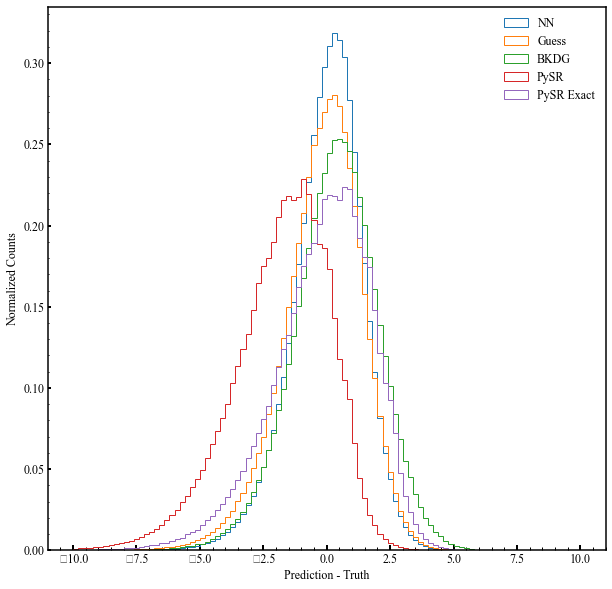

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pdf['bkdg_signal_pred'] = pdf['jet_nparts']- pdf['bkdg_pred']
pdf['bkdg_signal_res'] = pdf['bkdg_signal_pred'] - pdf['jet_nparts_pythia']
pdf['pysr_pred_num'] =  2.0*pdf['jet_pt_raw']- pdf['jet_nparts']
pdf['pysr_pred'] = pdf['pysr_pred_num']/pdf['jet_track_pt_0']
pdf['pysr_res'] = pdf['pysr_pred'] - pdf['jet_nparts_pythia']

pdf['pysr_exact_pred_num'] = 1.6192712*pdf['jet_track_pt_0'] + 2.0888467*pdf['jet_pt_raw']-1.1016128*pdf['jet_nparts']
pdf['pysr_exact_pred'] = pdf['pysr_exact_pred_num']/pdf['jet_track_pt_0']
pdf['pysr_exact_res'] = pdf['pysr_exact_pred'] - pdf['jet_nparts_pythia']


ax.hist(pdf['pred_res'], bins=100, range=(-10,10), histtype='step', label='NN', density=True)
ax.hist(pdf['bg_res'], bins=100, range=(-10,10), histtype='step', label='Guess', density=True)
ax.hist(pdf['bkdg_signal_res'], bins=100, range=(-10,10), histtype='step', label='BKDG', density=True)
ax.hist(pdf['pysr_res'], bins=100, range=(-10,10), histtype='step', label='PySR', density=True)
ax.hist(pdf['pysr_exact_res'], bins=100, range=(-10,10), histtype='step', label='PySR Exact', density=True)

ax.set_xlabel('Prediction - Truth')
ax.set_ylabel('Normalized Counts')
ax.legend(frameon=False, loc='best')
plt.show()